<a href="https://colab.research.google.com/github/aMloi/alx-low_level_programming/blob/master/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#investigating netflix movies


### you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of  contributing factors, if any.



⏰




In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 #Reading the Netflix data

netflix_df = pd.read_csv('netflix_data.csv',index_col=0)

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [ ]:
# Filtering the dataframe to include only movies
netflix_subset = netflix_df[netflix_df['type']== "Movie"]


In [ ]:
netflix_movies = netflix_df.loc[:,['title',"country","genre","release_year", "duration"],]
netflix_movies

,title,country,genre,release_year,duration
show_id,,,,,
s1,3%,Brazil,International TV,2020,4
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
...,...,...,...,...,...
s7783,Zozo,Sweden,Dramas,2005,99
s7784,Zubaan,India,Dramas,2015,111
s7785,Zulu Man in Japan,NaN,Documentaries,2019,44


In [ ]:
# Identifying short movies with duration less than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies

,title,country,genre,release_year,duration
show_id,,,,,
s1,3%,Brazil,International TV,2020,4
s6,46,Turkey,International TV,2016,1
s12,1983,Poland,Crime TV,2018,1
s13,1994,Mexico,Crime TV,2019,1
s17,Feb-09,NaN,International TV,2018,1
...,...,...,...,...,...
s7776,Zoids Wild,Japan,Anime Series,2018,1
s7778,Zombie Dumb,NaN,Kids,2018,2
s7780,Zona Rosa,Mexico,International TV,2019,1


In [ ]:
# Initializing an empty list to store colors for the scatter plot

colors = []
# Assigning colors based on the genre of the movie
for lab , row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('yellow')
    else:
        colors.append('green')

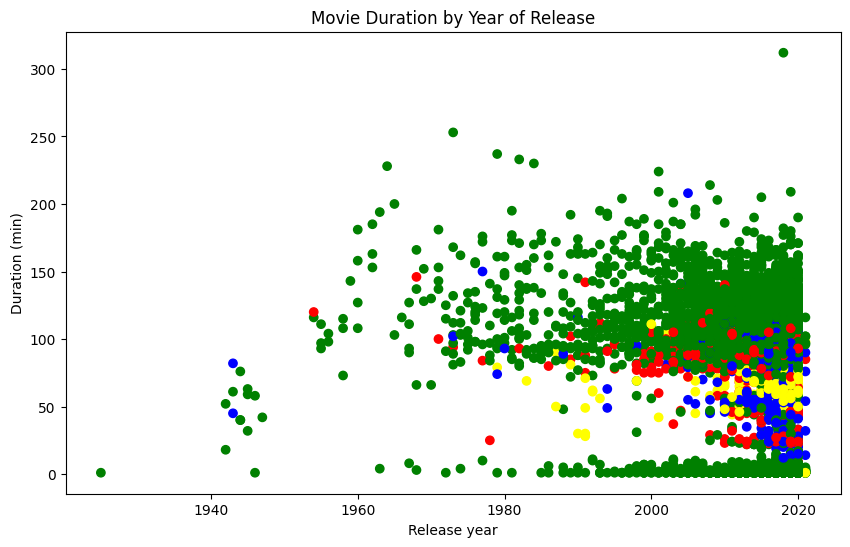

In [ ]:
# Creating a scatter plot to visualize movie duration by year of release

fig = plt.figure(figsize=(10, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show()
answer= 'no'